Loading data...
Loaded 60 raw labelled activity data samples.
Extracting features and labels for window size 5 and step size 5...
[[66.4         8.89044431 78.         56.        ]
 [70.2         9.92773892 82.         54.        ]
 [72.4        11.68931136 86.         54.        ]
 [67.6        11.49956521 82.         55.        ]
 [67.         10.63954886 82.         55.        ]
 [72.2        12.70275561 85.         54.        ]
 [71.4         9.54148835 81.         58.        ]
 [68.4        13.3056379  87.         56.        ]
 [66.4        11.35957746 82.         55.        ]
 [75.6        10.15086203 88.         63.        ]
 [71.2        12.18851919 84.         55.        ]
 [67.         11.6447413  83.         56.        ]]
[2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2.]
Finished feature extraction over 12 windows




/Users/makhwarandkhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


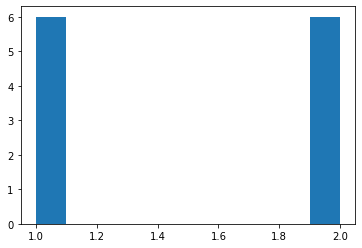

In [8]:
# -*- coding: utf-8 -*-
"""
This is the script used to train an activity recognition 
classifier on accelerometer data.

"""

import os
import sys
import numpy as np
from sklearn.tree import export_graphviz
from features import extract_features
from util import slidingWindow, reorient, reset_vars
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import pickle

# %%---------------------------------------------------------------------------
#
#		                 Load Data From Disk
#
# -----------------------------------------------------------------------------

print("Loading data...")
sys.stdout.flush()
data_file = 'my-test-data.csv'
data = np.genfromtxt(data_file, delimiter=',')
#print(np.isnan(data))
print("Loaded {} raw labelled activity data samples.".format(len(data)))
sys.stdout.flush()

# %%---------------------------------------------------------------------------
#
#		                    Pre-processing
#
# -----------------------------------------------------------------------------

#print("Reorienting accelerometer data...")
#sys.stdout.flush()
#reset_vars()
#reoriented = np.asarray([reorient(data[i,1], data[i,2], data[i,3]) for i in range(len(data))])
#reoriented_data_with_timestamps = np.append(data[:,0:1],reoriented,axis=1)
#data = np.append(reoriented_data_with_timestamps, data[:,-1:], axis=1)

# %%---------------------------------------------------------------------------
#
#		                Extract Features & Labels
#
# -----------------------------------------------------------------------------

window_size = 5
step_size = 5

# sampling rate should be about 25 Hz; you can take a brief window to confirm this
n_samples = 60
#time_elapsed_seconds = (data[n_samples,0] - data[0,0]) / 60
#sampling_rate = n_samples / time_elapsed_seconds

# TODO: list the class labels that you collected data for in the order of label_index (defined in collect-labelled-data.py)
class_names = ["nostress", "stressed"] #...

print("Extracting features and labels for window size {} and step size {}...".format(window_size, step_size))
sys.stdout.flush()

X = []
Y = []

for i, window_with_timestamp_and_label in slidingWindow(data, window_size, step_size):
    window = window_with_timestamp_and_label[:,1:-1] 
    feature_names, x = extract_features(window)
    X.append(x)
    Y.append(window_with_timestamp_and_label[4, -1])
    
X = np.asarray(X)
Y = np.asarray(Y)
n_features = len(X)
#print(n_features)
print(X)
print(Y)
print("Finished feature extraction over {} windows".format(len(X)))
#print("Unique labels found: {}".format(set(Y)))
print("\n")
sys.stdout.flush()

# %%---------------------------------------------------------------------------
#
#		                Test & Evaluate Classifier
#
# -----------------------------------------------------------------------------
cv = model_selection.KFold(n_splits=10, random_state=None, shuffle=True)

for train_index, test_index in cv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
#pickled_model = pickle.load(open('classifier.pickle', 'rb'))
#pickled_model.predict(X_test)

#with open('classifierallfeatures.pickle','rb') as modelFile:
     #model = pickle.load(modelFile)

#For second classifier only heart rate variability
with open('classifierhrvonly.pickle','rb') as modelFile:
     model = pickle.load(modelFile)
    
#For third classifier with no max
#with open('classifiernomax.pickle','rb') as modelFile:
     #model = pickle.load(modelFile)
    
#For fourth classifier with no max or mean
#with open('classifiernomaxnomean.pickle','rb') as modelFile:
     #model = pickle.load(modelFile)

plt.figure()
plt.hist(Y)
plt.show()
    
    